# Bank Customer Segmentation
Customer or market segmentation helps develop more effective investment and personalization strategies with the available information about clients. This is the process of grouping customers based on common characteristics, such as demographics or behaviors. This substantially improves targeting.

In this project, we segment Indian bank customers using data from more than one million transactions. We extract valuable information from these clusters and build dashboards with the insights. The final outputs can be used to improve products and marketing strategies.

## Problem
How to develop more effective investment and personalization strategies with the available information about clients?

## Procedure
We go about addressing the problem as follows

### We import necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore') # Hide the unsolicited warnings to make the notebook legible

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)}) # Adjusting the figure size

from sklearn.cluster import KMeans # We'll be using k-means for cluster analysis

### Extract the data which we'll be using for further implementation

In [2]:
raw_data = pd.read_csv('../Datasets/bank_transactions.csv')
raw_data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [3]:
raw_data.describe(include='all')

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
count,1048567,1048567,1045170,1047467,1048416,1.046198e+06,1048567,1.048567e+06,1.048567e+06
unique,1048567,884265,17254,3,9355,NaN,55,NaN,NaN
top,T1,C5533885,1/1/1800,M,MUMBAI,NaN,7/8/16,NaN,NaN
freq,1,6,57339,765530,103595,NaN,27261,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.154035e+05,NaN,1.570875e+05,1.574335e+03
std,NaN,NaN,NaN,NaN,NaN,8.464854e+05,NaN,5.126185e+04,6.574743e+03
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,4.721760e+03,NaN,1.240300e+05,1.610000e+02
50%,NaN,NaN,NaN,NaN,NaN,1.679218e+04,NaN,1.642260e+05,4.590300e+02
75%,NaN,NaN,NaN,NaN,NaN,5.765736e+04,NaN,2.000100e+05,1.200000e+03


### We see that there are inconsistency among variables hence, consequently we'll be performing data cleaning in order to balanace our data set with further analysis

In [4]:
data = raw_data.copy()
data = data.drop(['TransactionID', 'CustomerID', 'TransactionTime'], axis=1)
data.describe(include='all')

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR)
count,1045170,1047467,1048416,1.046198e+06,1048567,1.048567e+06
unique,17254,3,9355,NaN,55,NaN
top,1/1/1800,M,MUMBAI,NaN,7/8/16,NaN
freq,57339,765530,103595,NaN,27261,NaN
mean,NaN,NaN,NaN,1.154035e+05,NaN,1.574335e+03
std,NaN,NaN,NaN,8.464854e+05,NaN,6.574743e+03
min,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00
25%,NaN,NaN,NaN,4.721760e+03,NaN,1.610000e+02
50%,NaN,NaN,NaN,1.679218e+04,NaN,4.590300e+02
75%,NaN,NaN,NaN,5.765736e+04,NaN,1.200000e+03


In [5]:
data.isnull().sum()

CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionAmount (INR)       0
dtype: int64

### Data Cleaning
#### From the description above we can assume it's safe to eliminate NA data since, they make up just around 0.7% of the entire dataset

In [6]:
data_no_mv = data.dropna(axis=0)
data_no_mv.describe(include='all')

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR)
count,1041614,1041614,1041614,1.041614e+06,1041614,1.041614e+06
unique,17233,3,9275,NaN,55,NaN
top,1/1/1800,M,MUMBAI,NaN,7/8/16,NaN
freq,56292,760978,101997,NaN,27084,NaN
mean,NaN,NaN,NaN,1.149986e+05,NaN,1.566096e+03
std,NaN,NaN,NaN,8.467609e+05,NaN,6.561464e+03
min,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00
25%,NaN,NaN,NaN,4.728140e+03,NaN,1.600000e+02
50%,NaN,NaN,NaN,1.676852e+04,NaN,4.575000e+02
75%,NaN,NaN,NaN,5.742885e+04,NaN,1.200000e+03


#### Convert dates to proper format

In [7]:
data_no_mv['CustomerDOB'] = data_no_mv['CustomerDOB'].map(lambda x: "/".join(x.split("/")[:2]) + '/19' + x.split('/')[-1] if int(x.split('/')[-1]) < 69 else x)

In [8]:
data_no_mv['CustomerDOB_1'] = pd.to_datetime(data_no_mv['CustomerDOB'], format='%d/%m/%y', errors='coerce')
data_no_mv['CustomerDOB_2'] = pd.to_datetime(data_no_mv['CustomerDOB'], format='%d/%m/%Y', errors='coerce')
data_no_mv['CustomerDOB'] = data_no_mv['CustomerDOB_1'].fillna(data_no_mv['CustomerDOB_2'])
data_no_mv['TransactionDate'] = pd.to_datetime(data_no_mv['TransactionDate'], format='%d/%m/%y')
data_dates_rectified = data_no_mv.drop(['CustomerDOB_1', 'CustomerDOB_2'], axis=1)
data_dates_rectified.head()

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR)
0,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,25.0
1,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,27999.0
2,1996-11-26,F,MUMBAI,17874.44,2016-08-02,459.0
3,1973-09-14,F,MUMBAI,866503.21,2016-08-02,2060.0
4,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,1762.5


#### We then calculate age since, it turns out to be a relevent feature of our dataset

In [9]:
data_with_age = data_dates_rectified.copy()
data_with_age['Age'] = (data_with_age['TransactionDate'] - data_with_age['CustomerDOB']) / 365
data_with_age['Age']=data_with_age['Age'].apply(lambda x: x.days)
data_with_age = data_with_age.drop(['CustomerDOB', 'TransactionDate'], axis=1)

data_with_age.describe(include='all')

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Age
count,1041614,1041614,1.041614e+06,1.041614e+06,1.041614e+06
unique,3,9275,NaN,NaN,NaN
top,M,MUMBAI,NaN,NaN,NaN
freq,760978,101997,NaN,NaN,NaN
mean,NaN,NaN,1.149986e+05,1.566096e+03,4.081326e+01
std,NaN,NaN,8.467609e+05,6.561464e+03,4.279606e+01
min,NaN,NaN,0.000000e+00,0.000000e+00,1.600000e+01
25%,NaN,NaN,4.728140e+03,1.600000e+02,2.500000e+01
50%,NaN,NaN,1.676852e+04,4.575000e+02,2.900000e+01
75%,NaN,NaN,5.742885e+04,1.200000e+03,3.600000e+01


#### From our dataset we can observe that people between the age range of 25 - 50 performed frequent bank transactions as shown below

<Axes: xlabel='Age', ylabel='Count'>

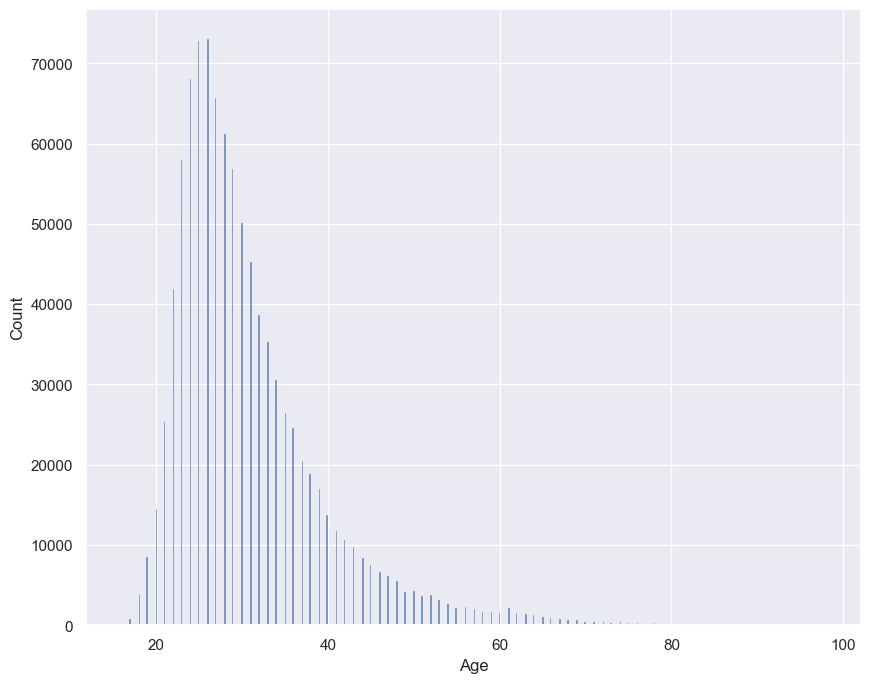

In [10]:
sns.histplot(data_with_age[data_with_age['Age'] < 100]['Age'])

#### We find the bank balance before the transaction as it can serve as a relevant piece of information and replace it with "CustAccountBalance"

In [11]:
data_with_balance = data_with_age.copy()
data_with_balance['BalancePriorTransaction'] = data_with_balance['CustAccountBalance'] + data_with_balance['TransactionAmount (INR)']
data_with_balance = data_with_balance.drop(['CustAccountBalance'], axis=1)
data_with_balance.head(10)

,CustGender,CustLocation,TransactionAmount (INR),Age,BalancePriorTransaction
0,F,JAMSHEDPUR,25.00,22,17844.05
1,M,JHAJJAR,27999.00,59,30269.69
2,F,MUMBAI,459.00,19,18333.44
3,F,MUMBAI,2060.00,42,868563.21
4,F,NAVI MUMBAI,1762.50,28,8476.93
5,F,ITANAGAR,676.00,43,54285.20
6,F,MUMBAI,566.00,24,1539.46
7,M,MUMBAI,148.00,34,95223.54
8,F,GURGAON,833.00,28,15739.96
9,M,MUMBAI,289.11,32,4568.33


### We then do the exploratory anaylsis as follows

##### Total Balance vs Age
As shown below, the distribution follows a bell curve that peaks around the age 50 indicating that people in that age group tend to _earn_ higher or have accumulated more wealth comparitively

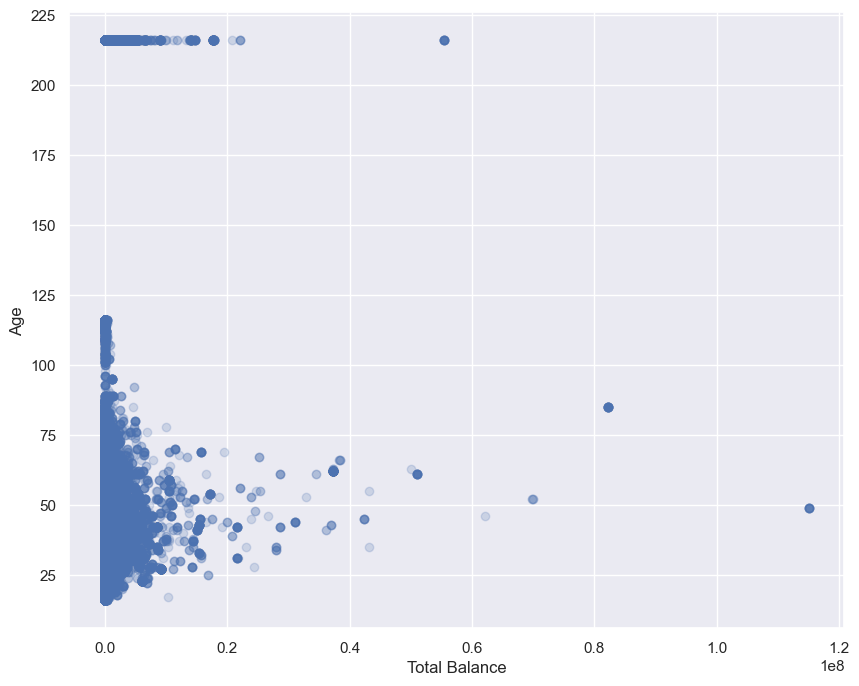

In [12]:
plt.scatter(data_with_balance['BalancePriorTransaction'], data_with_balance['Age'], alpha=0.2)
plt.xlabel('Total Balance')
plt.ylabel('Age')
plt.savefig('../Outputs/data_with_balance_tb_vs_age.png', bbox_inches='tight')
plt.show()

##### Transaction Amount vs Age
It can be clearly observed from the distribution below that people in the age group of 25 - 50 tend to spend a lot.

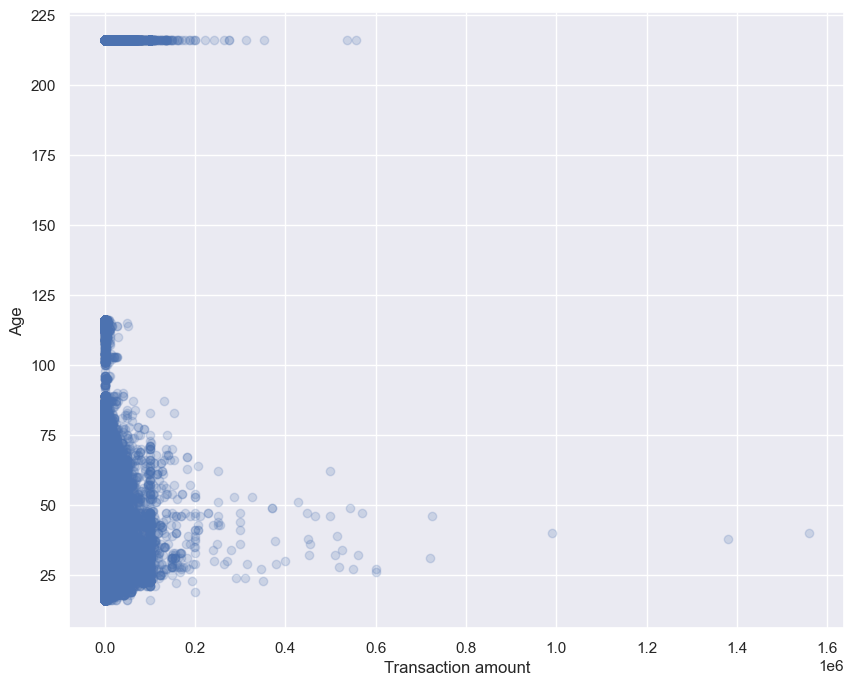

In [13]:
plt.scatter(data_with_balance['TransactionAmount (INR)'], data_with_balance['Age'], alpha=0.2)
plt.xlabel('Transaction amount')
plt.ylabel('Age')
plt.savefig('../Outputs/data_with_balance_ta_vs_age.png', bbox_inches='tight')
plt.show()

#### We can also draw out an insight from the below pie chart that over 73% bank transaction were performed by males and negligible transactions by Transgenders
Reason can be that majority of the bank account holders are males probably.

In [14]:
data_with_balance.groupby('CustGender').count()

,CustLocation,TransactionAmount (INR),Age,BalancePriorTransaction
CustGender,,,,
F,280635,280635,280635,280635
M,760978,760978,760978,760978
T,1,1,1,1


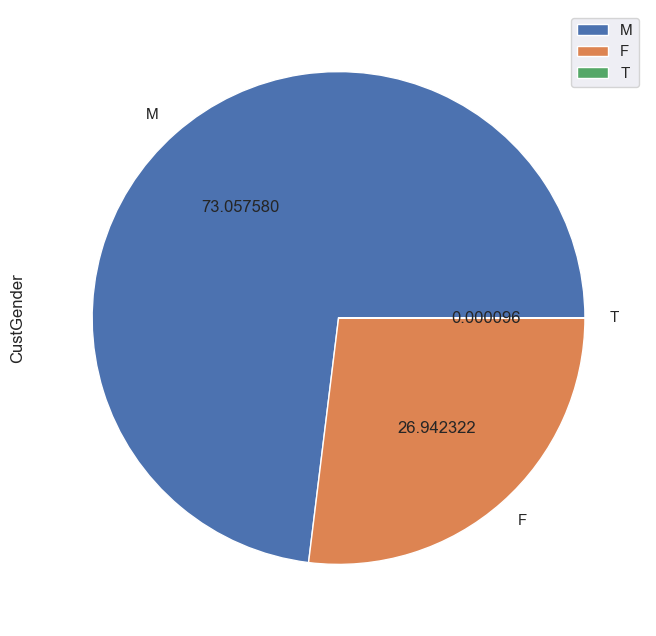

In [15]:
data_with_balance['CustGender'].value_counts().plot(kind='pie',autopct='%.6f')
plt.legend()
plt.savefig('../Outputs/data_with_balance_custgender_pie.png', bbox_inches='tight')
plt.show()

#### We can group the data by Gender and draw out insight

In [16]:
data_with_balance.groupby('CustGender')['TransactionAmount (INR)'].max()

CustGender
F    1380002.88
M    1560034.99
T      32500.00
Name: TransactionAmount (INR), dtype: float64

#### From the data we figure out that Transgenders performed the highest transaction on an average

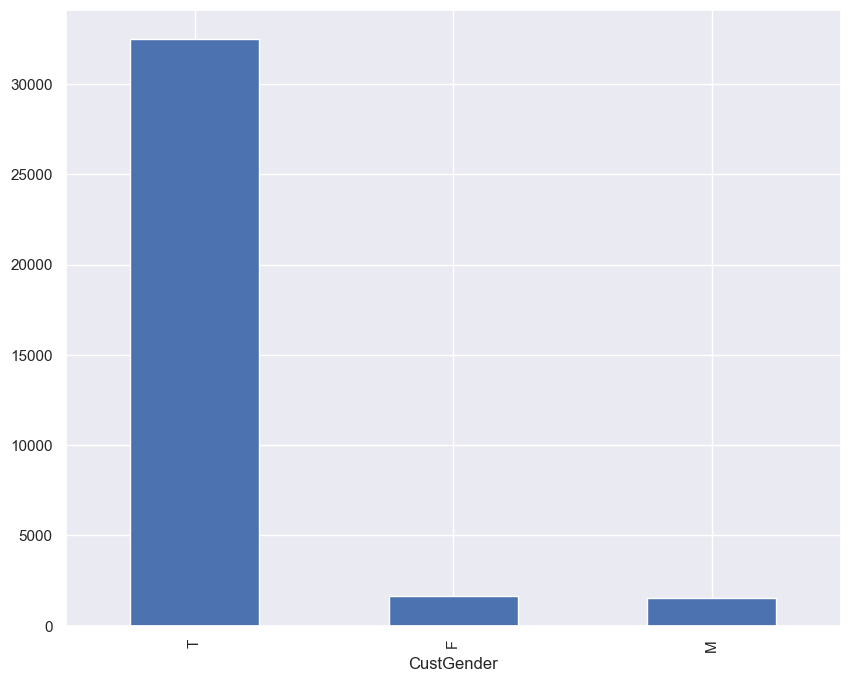

In [17]:
data_with_balance.groupby('CustGender')['TransactionAmount (INR)'].mean().sort_values(ascending=False).plot(kind='bar')
plt.savefig('../Outputs/data_with_balance_custgender_ta_bar.png', bbox_inches='tight')
plt.show()

In [18]:
data_with_balance.groupby('CustGender')['BalancePriorTransaction'].max().round()

CustGender
F     82265108.0
M    115063514.0
T        82550.0
Name: BalancePriorTransaction, dtype: float64

#### On grouping based on bank balance, we observe that males possess the highest wealth from the sample data

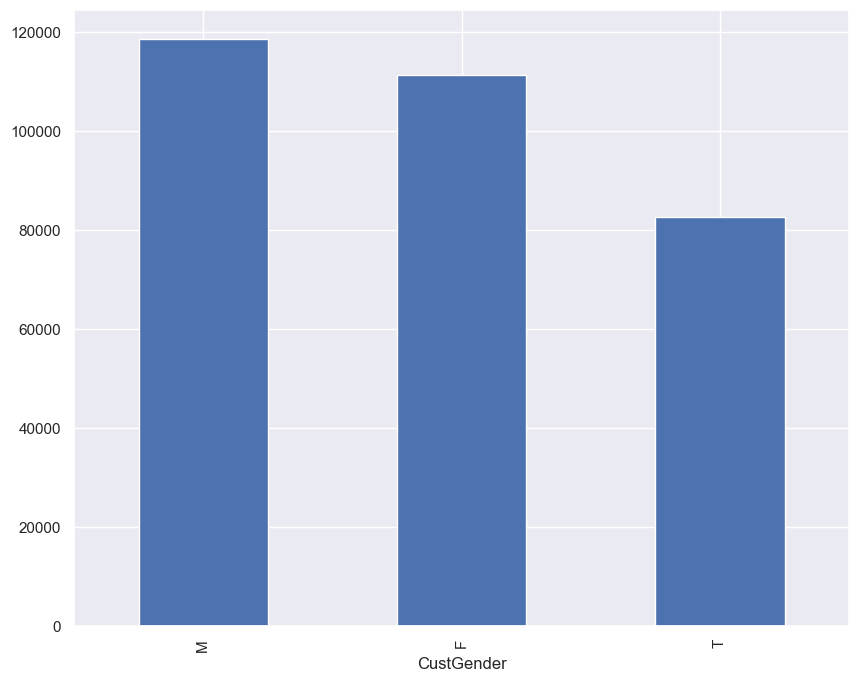

In [19]:
data_with_balance.groupby('CustGender')['BalancePriorTransaction'].mean().sort_values(ascending=False).plot(kind='bar')
plt.savefig('../Outputs/data_with_balance_custgender_bt_bar.png', bbox_inches='tight')
plt.show()

In [20]:
data_with_balance.groupby('CustGender')['Age'].min()

CustGender
F     16
M     16
T    216
Name: Age, dtype: int64

#### The below graph depicts female account holders are younger than males in average with low difference

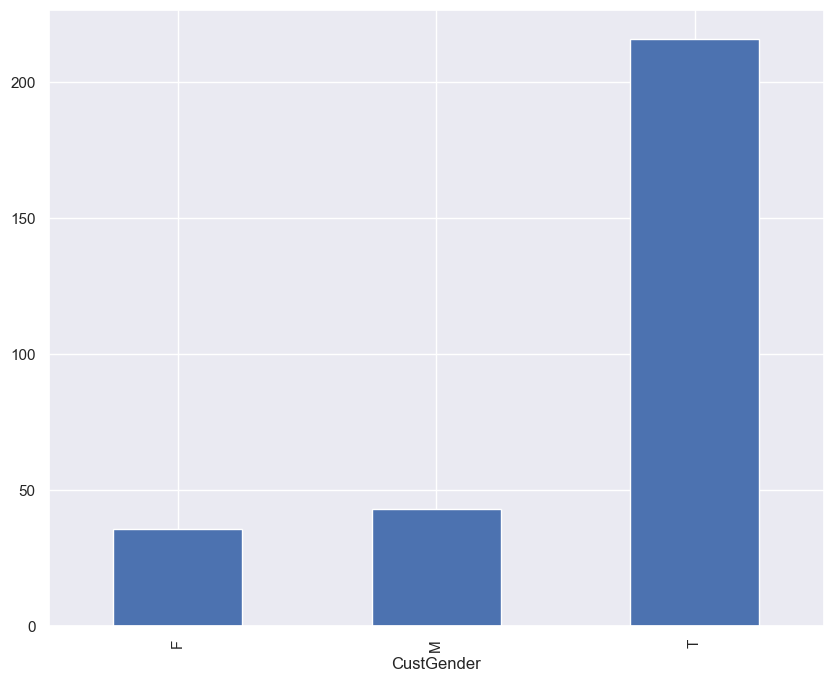

In [21]:
data_with_balance.groupby('CustGender')['Age'].mean().plot(kind='bar')
plt.savefig('../Outputs/data_with_balance_custgender_age_bar.png', bbox_inches='tight')
plt.show()

#### Since, gender is a catagorical data we can map it into a numeric one

In [22]:
data_gender_mapped = data_with_balance.copy()
data_gender_mapped['CustGender'] = data_gender_mapped['CustGender'].map({'M': 0, 'F': 1, 'T':2})
data_gender_mapped.head(10)

,CustGender,CustLocation,TransactionAmount (INR),Age,BalancePriorTransaction
0,1,JAMSHEDPUR,25.00,22,17844.05
1,0,JHAJJAR,27999.00,59,30269.69
2,1,MUMBAI,459.00,19,18333.44
3,1,MUMBAI,2060.00,42,868563.21
4,1,NAVI MUMBAI,1762.50,28,8476.93
5,1,ITANAGAR,676.00,43,54285.20
6,1,MUMBAI,566.00,24,1539.46
7,0,MUMBAI,148.00,34,95223.54
8,1,GURGAON,833.00,28,15739.96
9,0,MUMBAI,289.11,32,4568.33


#### If we were to clusterize the distribution along "Age" and "Transaction amount" data based on respective gender then it is observed that there's no bias among males and females

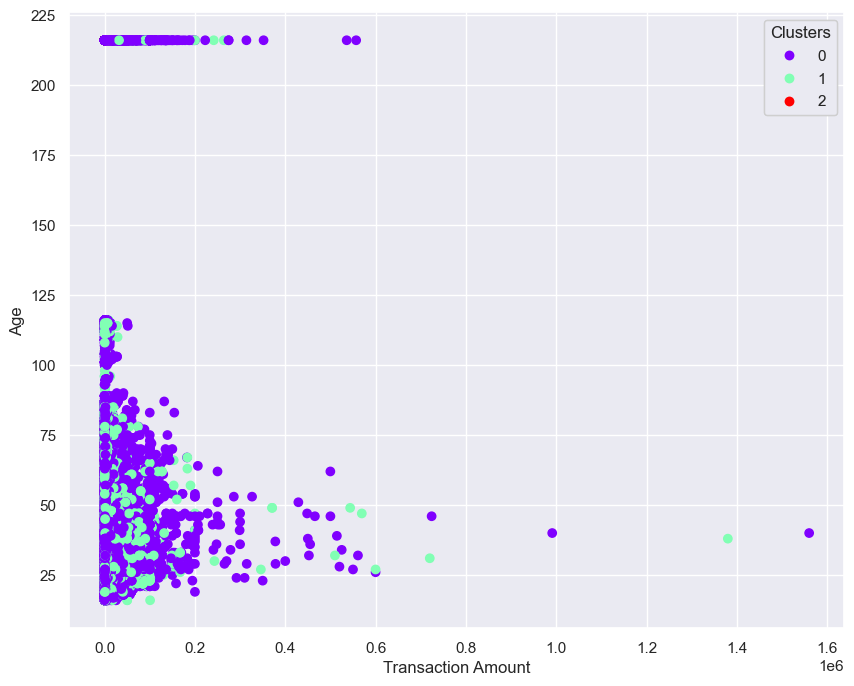

In [23]:
fig, ax = plt.subplots()
scatter = ax.scatter(data_gender_mapped['TransactionAmount (INR)'], data_gender_mapped['Age'],
                     c=data_gender_mapped['CustGender'], cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend1)
plt.xlabel('Transaction Amount')
plt.ylabel('Age')
plt.savefig('../Outputs/data_gender_mapped_ta_scatter.png', bbox_inches='tight')
plt.show()

#### Now on grouping the data by location we can draw out following insights

##### On grouping based on Transaction amount we observe that highest transaction was made at location Romford (mispronounced as "Roomford") on an average

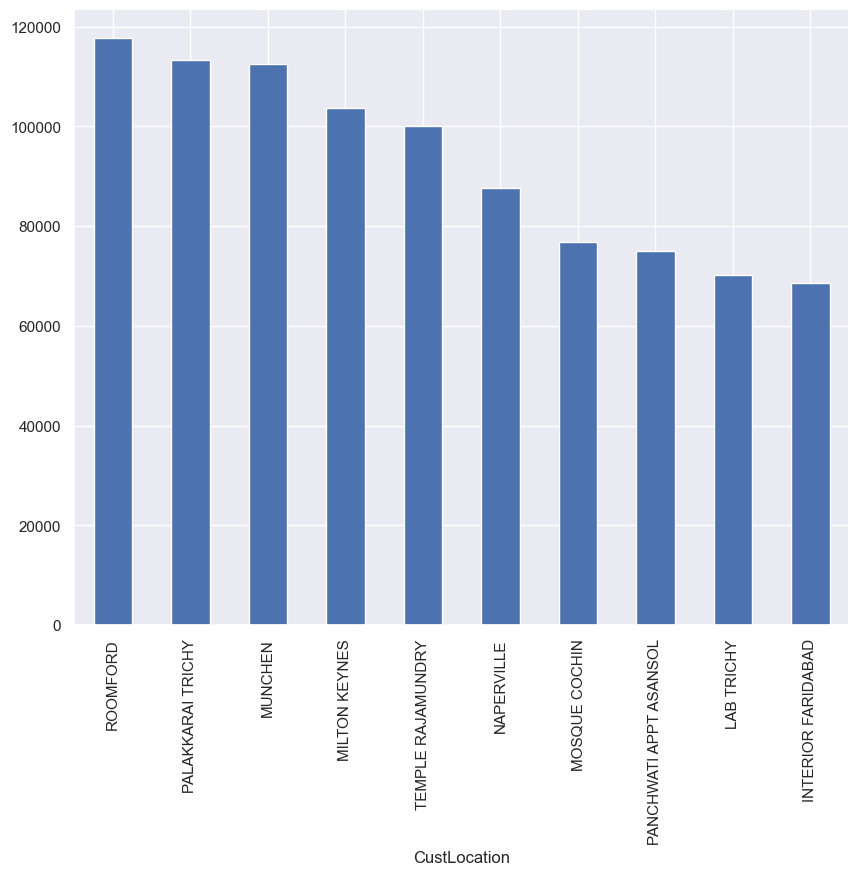

In [24]:
data_gender_mapped.groupby('CustLocation')['TransactionAmount (INR)'].mean().sort_values(ascending=False)[:10].plot(kind='bar')
plt.savefig('../Outputs/data_gender_mapped_ta_bar.png', bbox_inches='tight')
plt.show()

##### Based on bank balance, it's observed that people situated at Dubai possess highest wealth on an average

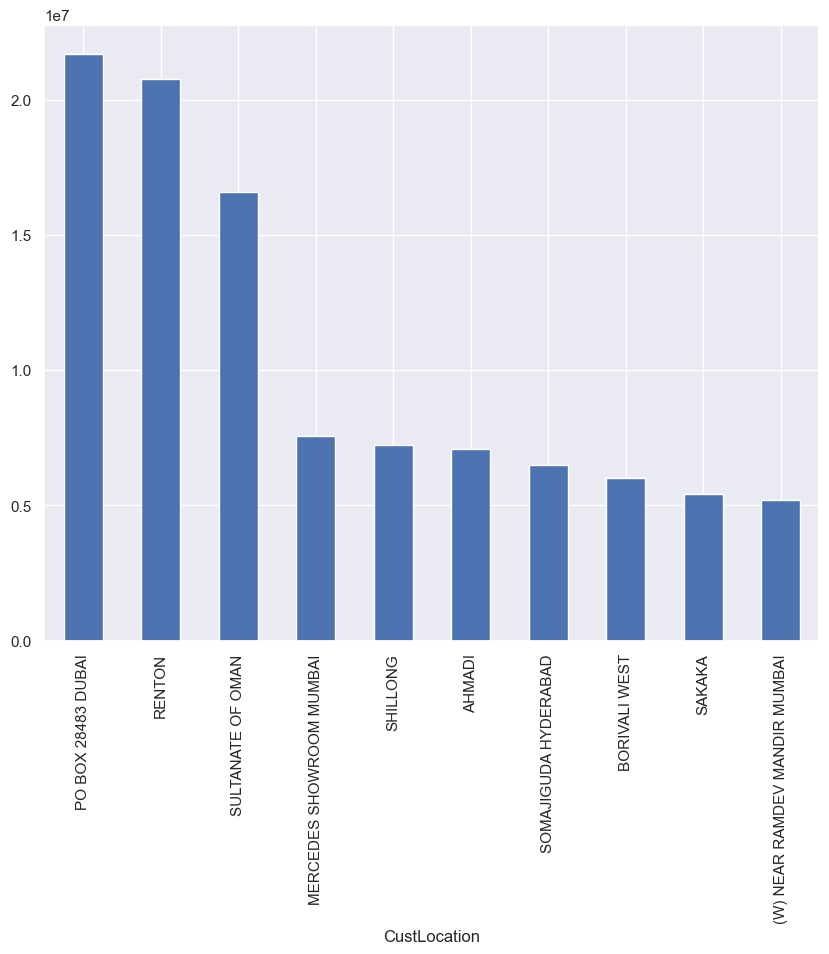

In [25]:
data_gender_mapped.groupby('CustLocation')['BalancePriorTransaction'].mean().sort_values(ascending=False)[:10].plot(kind='bar')
plt.savefig('../Outputs/data_gender_mapped_bt_bar.png', bbox_inches='tight')
plt.show()

##### Here's a graph depicting the average age of clients in each locations

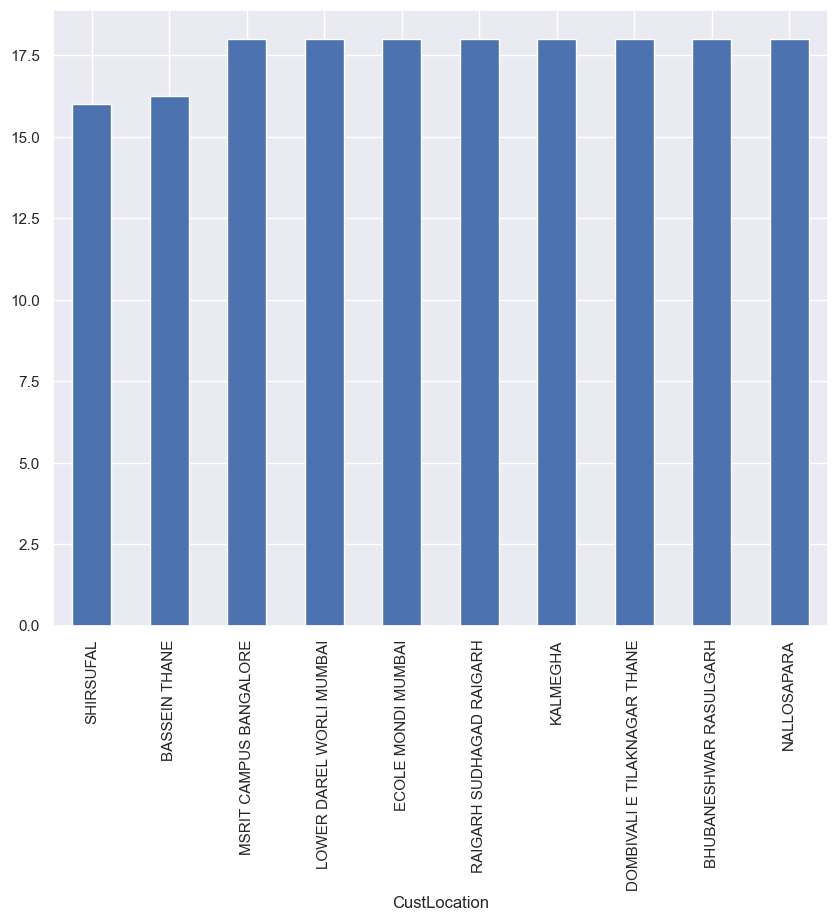

In [26]:
data_gender_mapped.groupby('CustLocation')['Age'].mean().sort_values()[:10].plot(kind='bar')
plt.savefig('../Outputs/data_gender_maped_age_mean_bar.png', bbox_inches='tight')
plt.show()

#### Since "CustLocation" is a catagorical data of nominal nature, we encode it using indexing method here

In [27]:
data_loc_mapped = data_gender_mapped.copy()
location_list = data_loc_mapped['CustLocation'].unique()
cust_loc_map = {}
_index = 0
for addr in location_list:
    cust_loc_map[addr] = _index
    _index += 1

data_loc_mapped['CustLocation']=data_loc_mapped['CustLocation'].map(cust_loc_map)
data_loc_mapped.head(10)

,CustGender,CustLocation,TransactionAmount (INR),Age,BalancePriorTransaction
0,1,0,25.00,22,17844.05
1,0,1,27999.00,59,30269.69
2,1,2,459.00,19,18333.44
3,1,2,2060.00,42,868563.21
4,1,3,1762.50,28,8476.93
5,1,4,676.00,43,54285.20
6,1,2,566.00,24,1539.46
7,0,2,148.00,34,95223.54
8,1,5,833.00,28,15739.96
9,0,2,289.11,32,4568.33


#### Scatter plot below justifies the relevence of "CustLocation" as a feature
Transactions of higher magnitude (>600000) dominate at a location

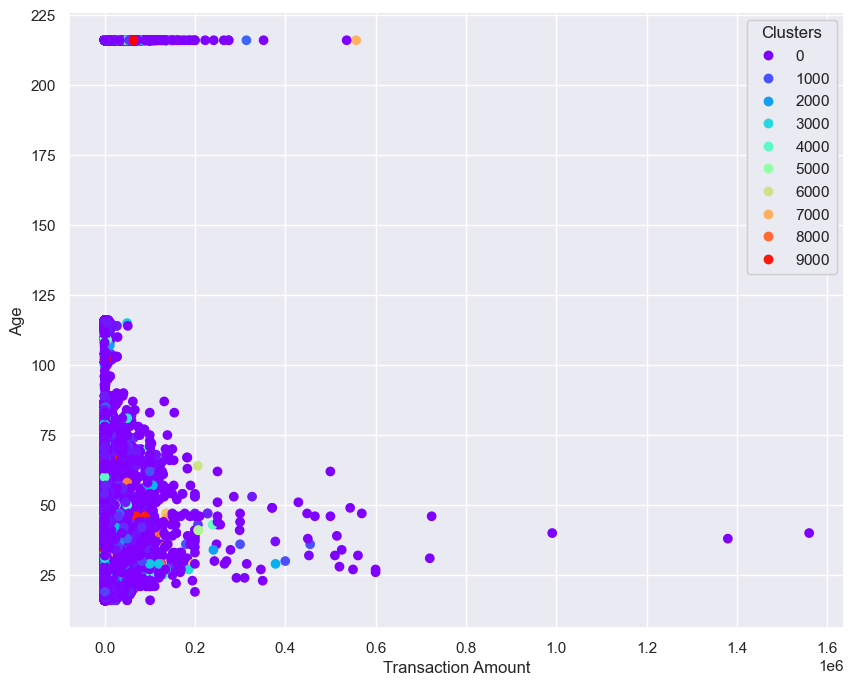

In [28]:
fig, ax = plt.subplots()
scatter = ax.scatter(data_loc_mapped['TransactionAmount (INR)'], data_loc_mapped['Age'],
                     c=data_loc_mapped['CustLocation'], cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend1)

plt.xlabel('Transaction Amount')
plt.ylabel('Age')
plt.savefig('../Outputs/data_loc_mapped_custlocation_scatter.png', bbox_inches='tight')
plt.show()

#### Since we have all the relevant feature and suffecient preprocessing, we can conclude our _Data Cleaning_ process

In [29]:
data_loc_mapped = data_loc_mapped.reset_index(drop=True) #Resettig the index for safety
data_cleaned = data_loc_mapped.copy()
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 5 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CustGender               1041614 non-null  int64  
 1   CustLocation             1041614 non-null  int64  
 2   TransactionAmount (INR)  1041614 non-null  float64
 3   Age                      1041614 non-null  int64  
 4   BalancePriorTransaction  1041614 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 39.7 MB


### We now preprocess the features by scaling them

In [30]:
from sklearn import preprocessing

x_scaled = preprocessing.scale(data_cleaned)
data_scaled = pd.DataFrame(x_scaled, columns=data_cleaned.columns)
data_scaled

,CustGender,CustLocation,TransactionAmount (INR),Age,BalancePriorTransaction
0,1.646687,-0.343901,-0.234871,-0.439603,-0.116526
1,-0.607274,-0.342930,4.028509,0.424963,-0.101859
2,1.646687,-0.341959,-0.168727,-0.509703,-0.115949
3,1.646687,-0.341959,0.075273,0.027730,0.887631
4,1.646687,-0.340988,0.029933,-0.299403,-0.127583
...,...,...,...,...,...
1041609,-0.607274,-0.333221,-0.116909,-0.346136,-0.127633
1041610,-0.607274,-0.300211,-0.168575,-0.392870,-0.104808
1041611,-0.607274,-0.307978,-0.121329,-0.322770,0.125074
1041612,-0.607274,-0.275938,-0.086276,-0.065736,-0.124466


### Lets train k-means clustering model to segment the data into 3 groups initially
A good strategy is to encourage the clients from Cluster 1 as **“platinum clients”**, Cluster 2 borrowers to be chosen as **“gold clients”**, and Cluster 3 to remain the weakest group of loyal customers **“silver”**.

In [31]:
# Fiddle with K (the number of clusters)
kmeans = KMeans(3)
# Fit the data
kmeans.fit(data_scaled)
# Create a new data frame with the predicted clusters
clusters_3 = data_cleaned.copy()
clusters_3['cluster_pred'] = kmeans.fit_predict(data_scaled)
clusters_3

,CustGender,CustLocation,TransactionAmount (INR),Age,BalancePriorTransaction,cluster_pred
0,1,0,25.0,22,17844.05,1
1,0,1,27999.0,59,30269.69,0
2,1,2,459.0,19,18333.44,1
3,1,2,2060.0,42,868563.21,1
4,1,3,1762.5,28,8476.93,1
...,...,...,...,...,...,...
1041609,0,11,799.0,26,8434.19,0
1041610,0,45,460.0,24,27771.42,0
1041611,0,37,770.0,27,222527.06,0
1041612,0,70,1000.0,38,11117.87,0


### We can draw following insights

#### Total Balance vs Transaction Amount

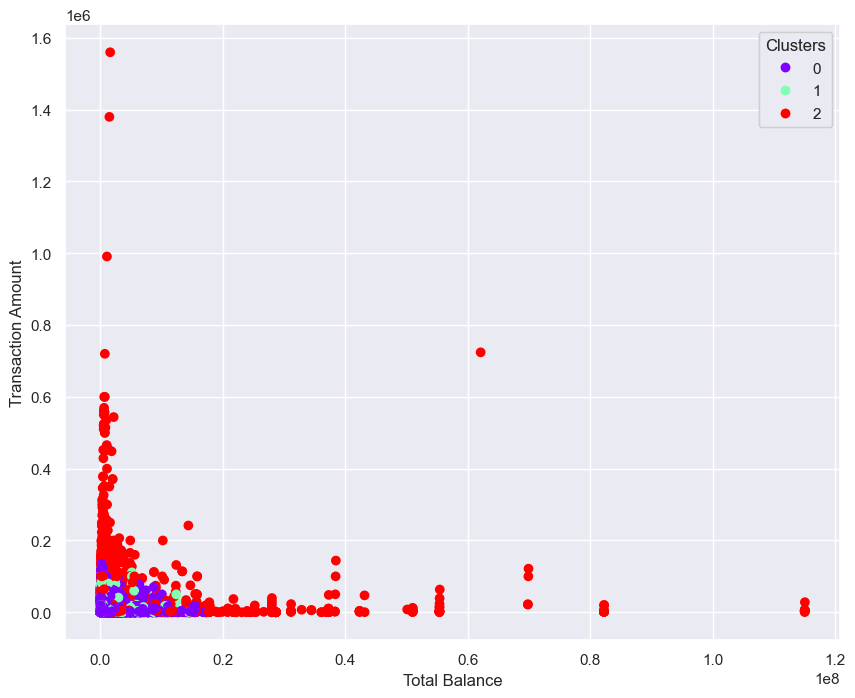

In [32]:
fig, ax = plt.subplots()
scatter = ax.scatter(clusters_3['BalancePriorTransaction'],
                     clusters_3['TransactionAmount (INR)'],
                     c=clusters_3['cluster_pred'], cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend1)
plt.xlabel('Total Balance')
plt.ylabel('Transaction Amount')
plt.savefig('../Outputs/cluster3_bt_ta_scatter.png', bbox_inches='tight')
plt.show()

#### Total Balance vs Age

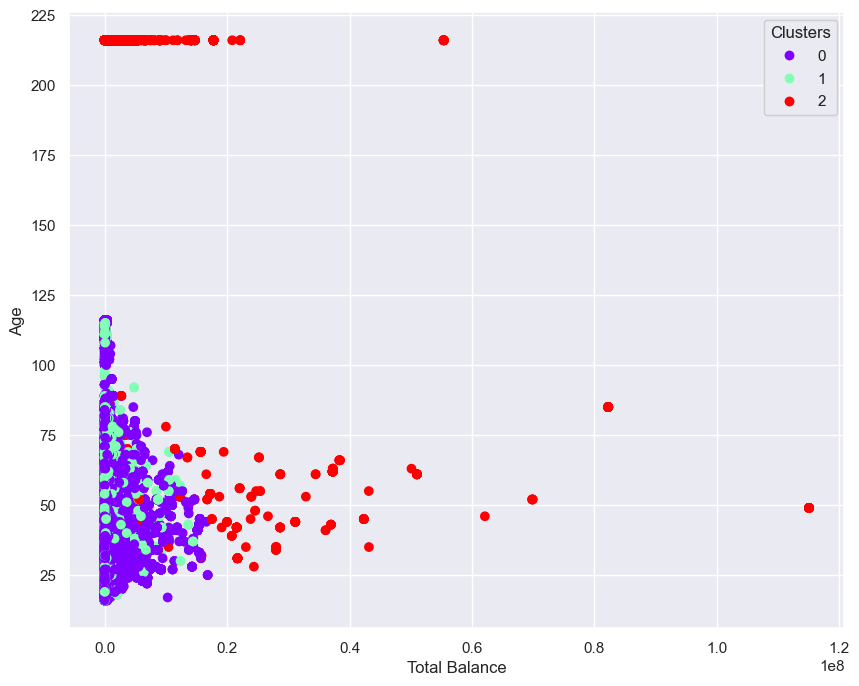

In [33]:
fig, ax = plt.subplots()
scatter = ax.scatter(clusters_3['BalancePriorTransaction'],
                     clusters_3['Age'],
                     c=clusters_3['cluster_pred'], cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend1)
plt.xlabel('Total Balance')
plt.ylabel('Age')
plt.savefig('../Outputs/cluster3_bt_age_scatter.png', bbox_inches='tight')
plt.show()

#### Transaction Amount vs Age

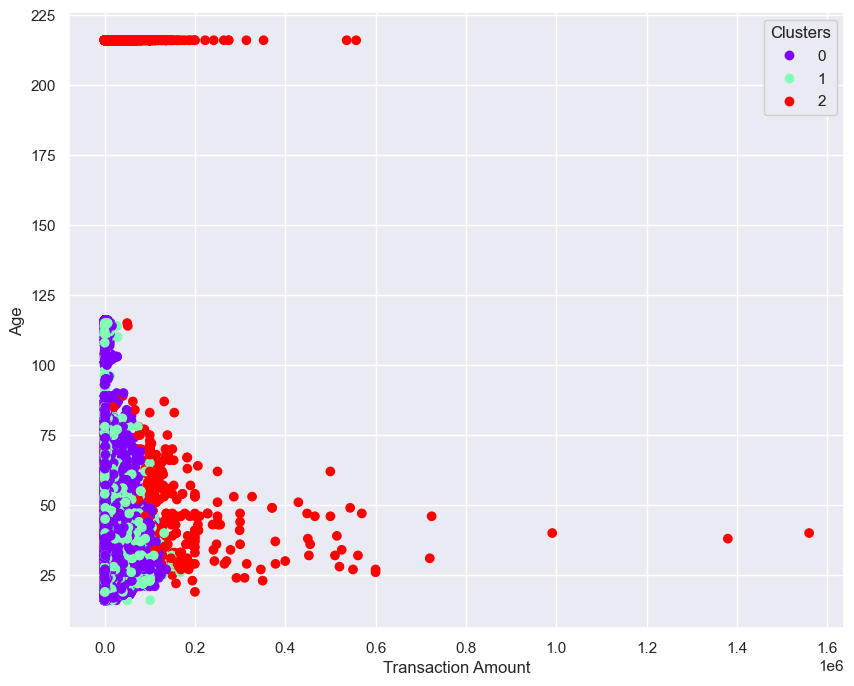

In [34]:
fig, ax = plt.subplots()
scatter = ax.scatter(clusters_3['TransactionAmount (INR)'],
                     clusters_3['Age'],
                     c=clusters_3['cluster_pred'], cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend1)
plt.xlabel('Transaction Amount')
plt.ylabel('Age')
plt.savefig('../Outputs/cluster3_ta_age_scatter.png', bbox_inches='tight')
plt.show()

In [35]:
clusters_3.groupby('cluster_pred').count()

,CustGender,CustLocation,TransactionAmount (INR),Age,BalancePriorTransaction
cluster_pred,,,,,
0,711975,711975,711975,711975,711975
1,272807,272807,272807,272807,272807
2,56832,56832,56832,56832,56832


In [36]:
clusters_3.groupby('cluster_pred')['BalancePriorTransaction'].mean()

cluster_pred
0     98372.704873
1     95106.725240
2    447472.161819
Name: BalancePriorTransaction, dtype: float64

In [37]:
clusters_3.groupby('cluster_pred')['TransactionAmount (INR)'].mean()

cluster_pred
0    1331.802120
1    1569.669307
2    4484.111285
Name: TransactionAmount (INR), dtype: float64

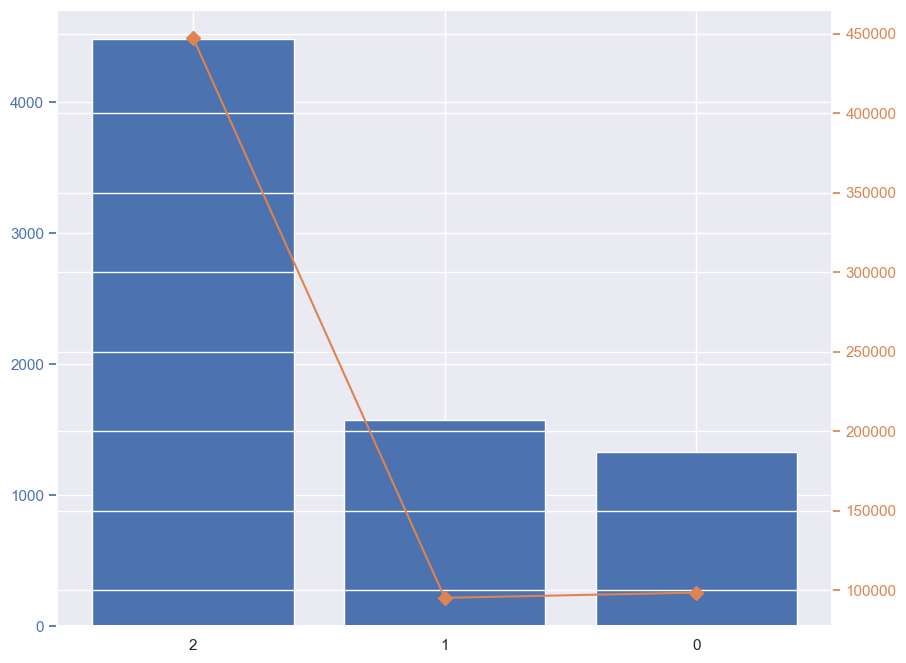

In [38]:
df = pd.DataFrame(clusters_3.groupby('cluster_pred')['TransactionAmount (INR)'].mean().round(2))
balance = pd.DataFrame(clusters_3.groupby('cluster_pred')['BalancePriorTransaction'].mean().round(2))
df = pd.concat([df, balance], axis = 1)
df = df.sort_values(by='TransactionAmount (INR)', ascending=False)
df.index = df.index.map(str)
fig, ax = plt.subplots()
ax.bar(df.index, df['TransactionAmount (INR)'], color="C0")
ax2 = ax.twinx()
ax2.plot(df.index, df['BalancePriorTransaction'], color="C1", marker="D", ms=7)

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.savefig('../Outputs/cluster3_pareto.png', bbox_inches='tight')
plt.show()

#### We can split the people based on the trend above as follows
1) People who Spend more and also have more balance, on an average
2) People who spend lesser and have lesser balance than group 1, on an average
3) People who spend more than group 2 but have balance lesser than them, on an average

#### Summary
##### Ranked based on loyalty
**_Platinum_** - such clients are more likely to buy loan and have higher credibility - **56,832** <br/>
**_Gold_** - such clients are more likely to buy loan but have lower credibility - **2,72,807** <br/>
**_Silver_** - such clients are less likely to buy loan and have higher credibility - **7,11,975** <br/>

### Previously the number of clusters was chosen based on our convinience so, now let's see the number of clusters that the ML model suggests

#### Here we'll be using the "Elbow method"

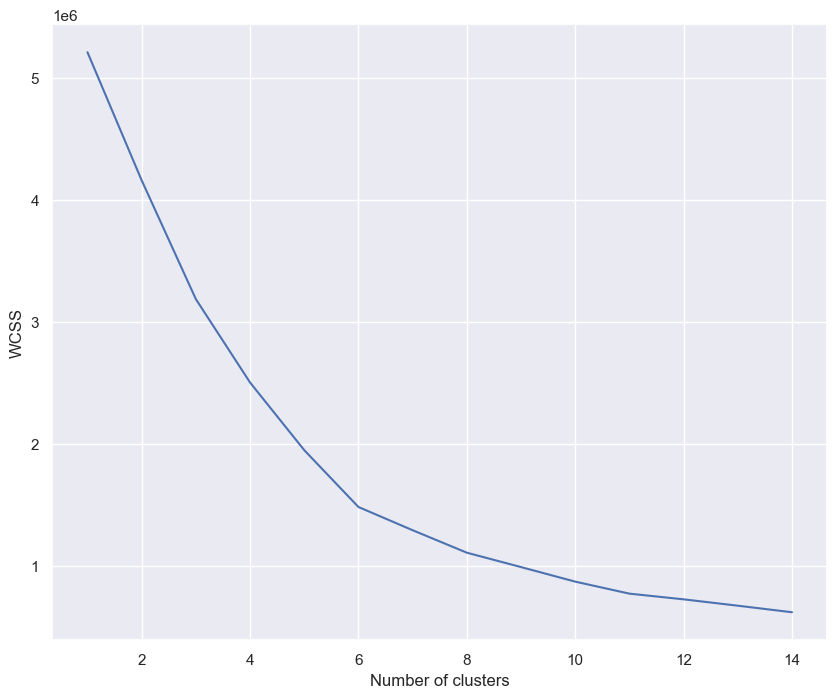

In [39]:
# Createa an empty list
wcss =[]

# Create all possible cluster solutions with a loop
# We have chosen to get solutions from 1 to 9 clusters; you can ammend that if you wish
for i in range(1,15):
    # Clsuter solution with i clusters
    kmeans = KMeans(i)
    # Fit the STANDARDIZED data
    kmeans.fit(data_scaled)
    # Append the WCSS for the iteration
    wcss.append(kmeans.inertia_)


# Plot the number of clusters vs WCSS
plt.plot(range(1,15),wcss)
# Name your axes
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### As depicted in the above graph, it'll be optimal to choose the number of clusters as 6

In [40]:
kmeans_new = KMeans(6)
kmeans_new.fit(data_scaled)
# Create a new data frame with the predicted clusters
clusters = data_cleaned.copy()
clusters['cluster_pred'] = kmeans_new.fit_predict(data_scaled)
clusters

,CustGender,CustLocation,TransactionAmount (INR),Age,BalancePriorTransaction,cluster_pred
0,1,0,25.0,22,17844.05,5
1,0,1,27999.0,59,30269.69,0
2,1,2,459.0,19,18333.44,5
3,1,2,2060.0,42,868563.21,5
4,1,3,1762.5,28,8476.93,5
...,...,...,...,...,...,...
1041609,0,11,799.0,26,8434.19,0
1041610,0,45,460.0,24,27771.42,0
1041611,0,37,770.0,27,222527.06,0
1041612,0,70,1000.0,38,11117.87,0


#### Now lets perform the cluster analysis as follows

##### Total Balance vs Transaction Amount

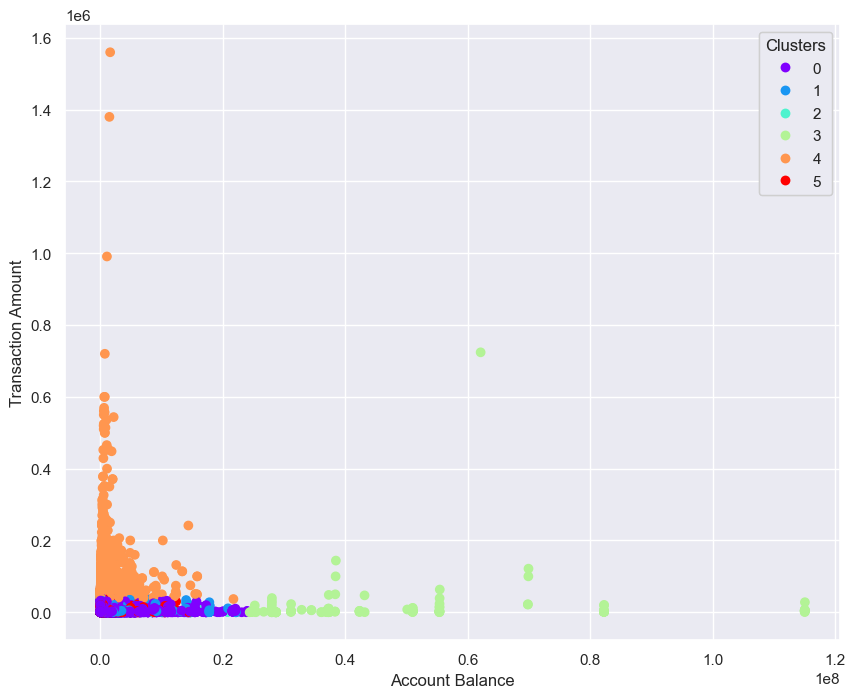

In [41]:
# Plot
fig, ax = plt.subplots()
scatter = ax.scatter(clusters['BalancePriorTransaction'], clusters['TransactionAmount (INR)'],
                     c=clusters['cluster_pred'], cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend1)

plt.xlabel('Account Balance')
plt.ylabel('Transaction Amount')
plt.savefig('../Outputs/clusters_bt_ta_scatter.png', bbox_inches='tight')
plt.show()

##### Total Balance vs Age

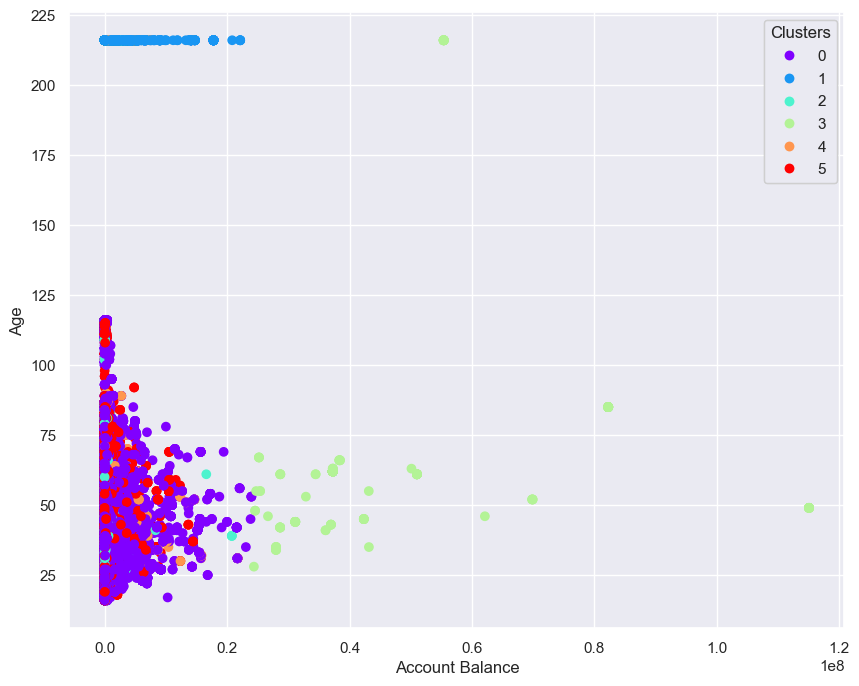

In [42]:
# Plot
fig, ax = plt.subplots()
scatter = ax.scatter(clusters['BalancePriorTransaction'], clusters['Age'],
                     c=clusters['cluster_pred'], cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend1)

plt.xlabel('Account Balance')
plt.ylabel('Age')
plt.savefig('../Outputs/clusters_bt_age_scatter.png', bbox_inches='tight')
plt.show()

##### Transaction Amount vs Age

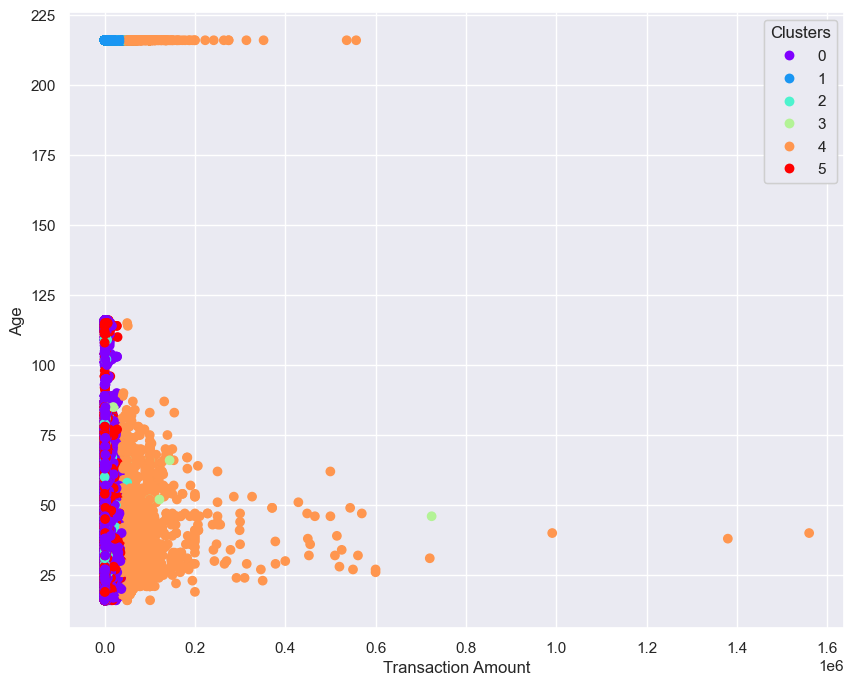

In [43]:
# Plot
fig, ax = plt.subplots()
scatter = ax.scatter(clusters['TransactionAmount (INR)'], clusters['Age'],
                     c=clusters['cluster_pred'], cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend1)

plt.xlabel('Transaction Amount')
plt.ylabel('Age')
plt.savefig('../Outputs/clusters_ta_age_scatter.png', bbox_inches='tight')
plt.show()

In [44]:
clusters.groupby('cluster_pred').count()

,CustGender,CustLocation,TransactionAmount (INR),Age,BalancePriorTransaction
cluster_pred,,,,,
0,680316,680316,680316,680316,680316
1,52781,52781,52781,52781,52781
2,40626,40626,40626,40626,40626
3,173,173,173,173,173
4,3869,3869,3869,3869,3869
5,263849,263849,263849,263849,263849


In [45]:
clusters.groupby('cluster_pred')['TransactionAmount (INR)'].max().round(2)

cluster_pred
0      38525.00
1      42000.00
2      50000.00
3     724122.00
4    1560034.99
5      39330.00
Name: TransactionAmount (INR), dtype: float64

In [46]:
clusters.groupby('cluster_pred')['TransactionAmount (INR)'].mean().sort_values(ascending=False).round(2)

cluster_pred
4    75068.58
3    12386.05
1     2403.35
2     1449.63
5     1370.04
0     1163.37
Name: TransactionAmount (INR), dtype: float64

In [47]:
clusters.groupby('cluster_pred')['BalancePriorTransaction'].mean().sort_values(ascending=False).round(2)

cluster_pred
3    48212928.45
4      579250.46
1      263999.28
0      100557.21
5       94713.70
2       86115.48
Name: BalancePriorTransaction, dtype: float64

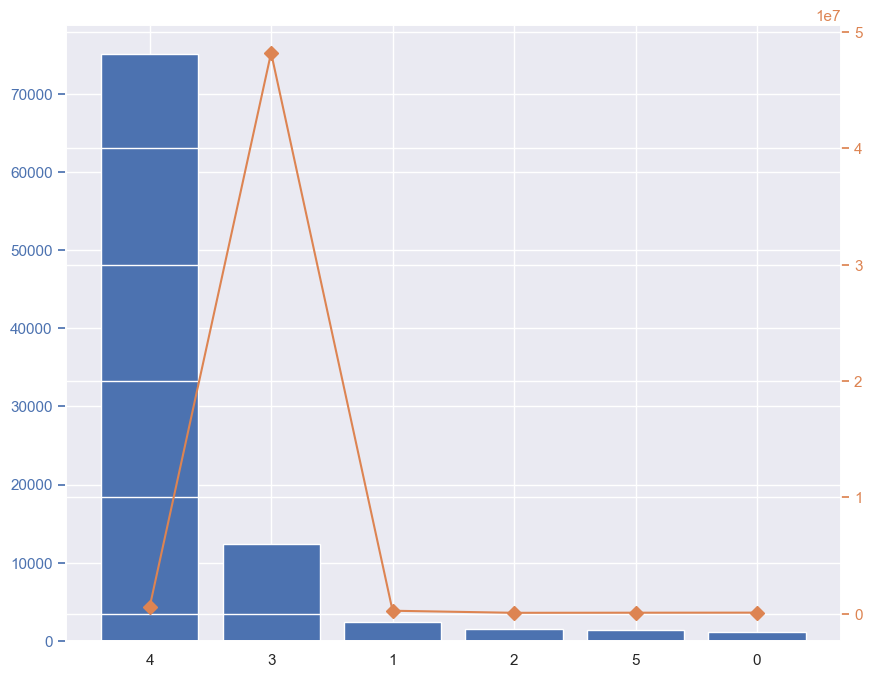

In [48]:
df = pd.DataFrame(clusters.groupby('cluster_pred')['TransactionAmount (INR)'].mean().round(2))
balance = pd.DataFrame(clusters.groupby('cluster_pred')['BalancePriorTransaction'].mean().round(2))
df = pd.concat([df, balance], axis = 1)
df = df.sort_values(by='TransactionAmount (INR)', ascending=False)
df.index = df.index.map(str)
fig, ax = plt.subplots()
ax.bar(df.index, df['TransactionAmount (INR)'], color="C0")
ax2 = ax.twinx()
ax2.plot(df.index, df['BalancePriorTransaction'], color="C1", marker="D", ms=7)

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.savefig('../Outputs/clusters_pareto.png', bbox_inches='tight')
plt.show()

#### We can split the people into groups based on the following observable trend
1. People who spend significantly less than group 2 but have the highest bank balance, on average.
2. People who spend the highest but have a bank bank balance significantly less than group 1, on average.
3. People who spend significantly less than group 1 but have bank balance less than group 2, on average.
4. People who spend the lowest but have bank balance less than group 3, on average.
5. People who spend more than group 4 but have bank balance less than group 4, on average.
6. People who spend more than group 5 but have the lowest bank balance, on average.

### Summary
#### We can think of a tier list based on marketing focus as below
##### Tier S, Tier A, Tier B-1, Tier B-2, Tier B-3 and Tier B-4
Clients from 5th cluster can be put into _**S tier**_ since, they're capable of affording bigger loans but currently don't wish to, by judging from their spending habits. Therefore, marketing can be focused on them the most.

Clients from 4th cluster can be put into _**A tier**_ since, they're likely to buy bigger loans which they can too afford.

Clients from 2nd, 3rd, 1st and 0th cluster are capable of affording smaller loans hence, can be put into _**B tier**_. This class of clients can be further ranked based on the likelihood of them purchasing a loan by judging on their spending habits.
2nd cluster can be ranked as _**B-1**_, 3rd cluster as _**B-2**_, 1st cluster as _**B-3**_ and 0th cluster as _**B-4**_

| Tier | | Cluster |
| --- | --- |----------- |
| **S** | | 5 |
| **A** | | 4 |
| **B** | **1** | 2 |
|  | **2** | 3 |
|   | **3** | 1 |
|   | **4** | 0 |